In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras

batch_size=50
epochs=150
lr=0.001



In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/AAuto2024/

X=np.load('Xtrain.npy')
y=np.load('ytrain.npy')


train_images = (X).astype('float32')/255.0
train_labels = keras.utils.to_categorical(y,2)

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2)

/content/drive/MyDrive/Colab Notebooks/AAuto2024


In [4]:
model_MLP = Sequential()
model_MLP.add(Dense(16,activation = 'relu',input_dim = 2700))
model_MLP.add(Dense(8,activation = 'relu'))
model_MLP.add(Dense(2,activation = 'softmax'))

model_MLP.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          43,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,370 (169.41 KB)

 Trainable params: 43,370 (169.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6474 - loss: 0.5985 - val_accuracy: 0.6834 - val_loss: 0.5504
Epoch 2/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7073 - loss: 0.5453 - val_accuracy: 0.7335 - val_loss: 0.5274
Epoch 3/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7426 - loss: 0.5251 - val_accuracy: 0.7215 - val_loss: 0.5372
Epoch 4/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7395 - loss: 0.5216 - val_accuracy: 0.7233 - val_loss: 0.5247
Epoch 5/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7674 - loss: 0.4916 - val_accuracy: 0.7378 - val_loss: 0.5160
Epoch 6/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7615 - loss: 0.4882 - val_accuracy: 0.7372 - val_loss: 0.5105
Epoch 7/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.4851 - val_accuracy: 0.7390 - val_loss: 0.5311
Epoch 8/150
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7590 - loss: 0.4874 - val_acc

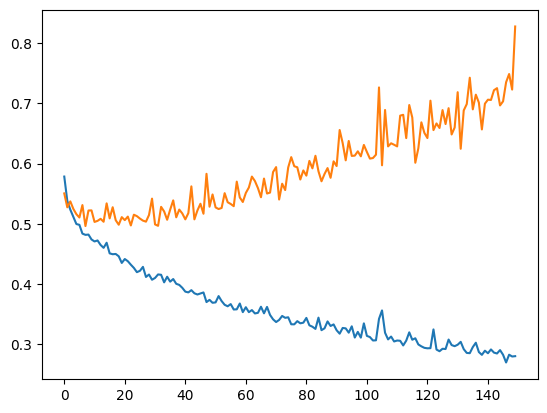

([<matplotlib.lines.Line2D at 0x7afb3c3ab490>], None)

In [5]:
adam = keras.optimizers.Adam(learning_rate = lr)
model_MLP.compile(optimizer = adam,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])



#MLP without early stopping
history = model_MLP.fit(x = X_train,y=y_train,epochs = epochs,batch_size=batch_size,validation_data = (X_val,y_val),verbose = 1)


####PLOT EVOLUTION
plt.figure(1)
plt.clf()
plt.plot(history.history['loss'], label='train'),
plt.plot(history.history['val_loss'], label='train'), plt.show()


In [6]:
X=np.load('Xtest.npy')
test_images = (X).astype('float32')/255.0
results_MLP = np.argmax(model_MLP.predict(test_images),1)



43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
